In [5]:
# load in data
from sklearn import datasets

df = datasets.load_iris()

X_train = df.data[:, [2,3]]
y_train = df.target

# define plot_decision_regions function again
# 只是画图，下次没必要自己打
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np 

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.2):
    
    # set up markers
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    # set valid colors based on y
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        # select the 0 and 1 column of samples where y=cl
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolors='black', alpha=1.0,
                    linewidths=1, marker='o',
                    s=100, label='test set')
        
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)

/var/folders/84/kh2lnvxd5cx0_6s9tdvbhyd00000gn/T/ipykernel_11022/2946914151.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


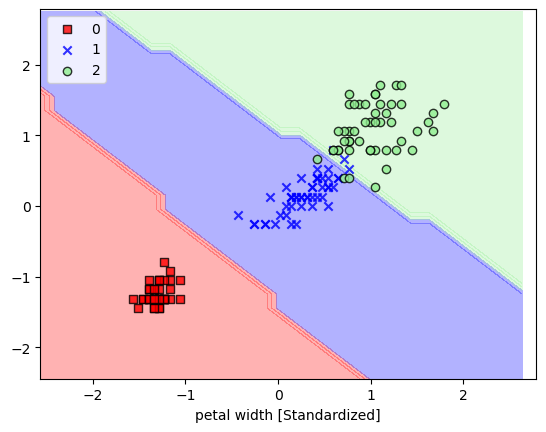

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std,
                      y_train,
                      classifier=svm,
                      test_idx=None)
plt.xlabel('petal length [Standardized]')
plt.xlabel('petal width [Standardized]')
plt.legend(loc='upper left')
plt.show()

#### Alternative from scikit-learn

/var/folders/84/kh2lnvxd5cx0_6s9tdvbhyd00000gn/T/ipykernel_11022/2946914151.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


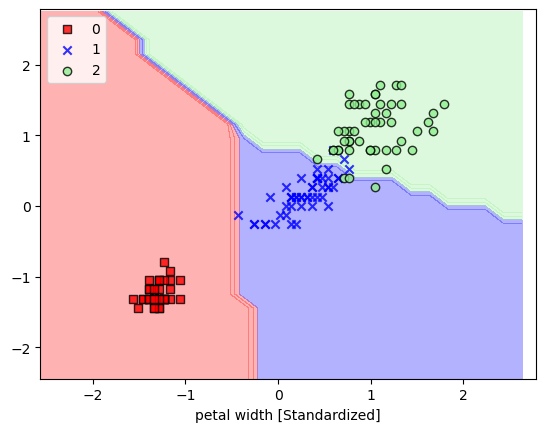

In [16]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log_loss')
svm = SGDClassifier(loss='hinge')

svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std,
                      y_train,
                      classifier=svm,
                      test_idx=None)
plt.xlabel('petal length [Standardized]')
plt.xlabel('petal width [Standardized]')
plt.legend(loc='upper left')
plt.show()

#### Solving nonlinear problems using a kernel

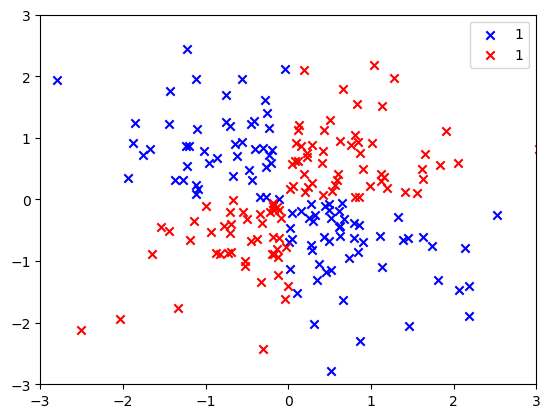

In [19]:
# Generate a set of random noise
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0],
            X_xor[y_xor==1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor==-1, 0],
            X_xor[y_xor==-1, 1],
            c='r', marker='x',
            label='1')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='best')
plt.show()

/var/folders/84/kh2lnvxd5cx0_6s9tdvbhyd00000gn/T/ipykernel_11022/2946914151.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


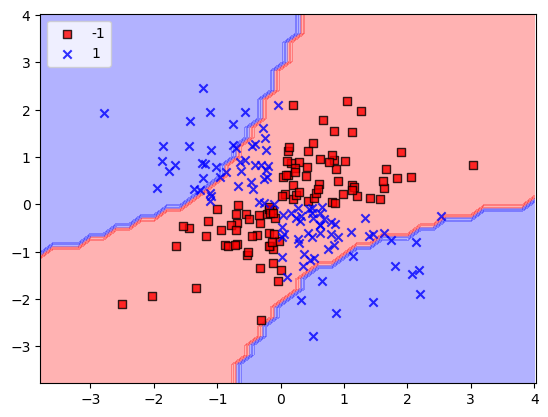

In [26]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.01, C=10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

# change gamma to see how it influence overfitting